<a href="https://colab.research.google.com/github/akanksha-cherukapalli/Simulation-and-modeling---CS6647XTIA/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Load libraries. We use the scipy.stats library.

In [2]:
import scipy.stats as stats


Use scipy library to create a randam uniform distribution data (100000 numbers from 0 to 10)

In [3]:
import numpy as np
from scipy.stats import uniform

# Set the seed for reproducibility
np.random.seed(42)

# Define the range of the uniform distribution
a = 0   # Lower bound
b = 10  # Upper bound

# Create the random uniform distribution
random_data = uniform.rvs(loc=a, scale=b-a, size=100000)

# Print the first 10 values
print(random_data[:10])


[3.74540119 9.50714306 7.31993942 5.98658484 1.5601864  1.5599452
 0.58083612 8.66176146 6.01115012 7.08072578]


Plot the following density distribution.
You can use figsize=(9,9), xlim=(-1,11)

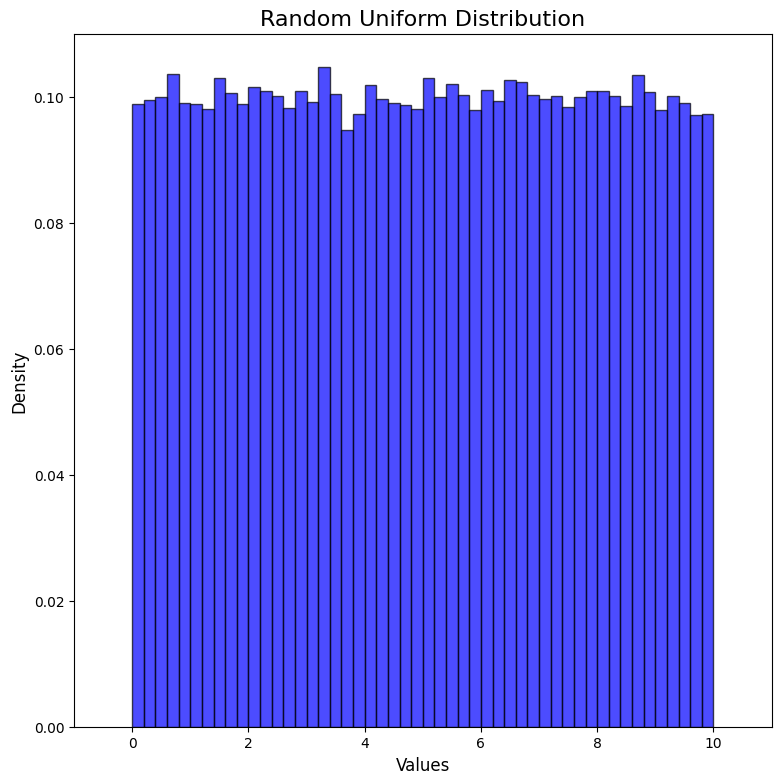

In [4]:
import matplotlib.pyplot as plt

# Set the figure size and x-axis limits
plt.figure(figsize=(9, 9))
plt.xlim(-1, 11)

# Plot the density distribution
plt.hist(random_data, density=True, bins=50, alpha=0.7, color='blue', edgecolor='black')

# Set the plot title and labels
plt.title('Random Uniform Distribution', fontsize=16)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Display the plot
plt.show()




Check scipy libraries and use useful functions.
cdf (cumulative distribution function) gives you the area under the distribution's density curve to the left of a certain value on the x axis. Calculate cdf with x axis from 0 to 2.5.

In [9]:
import scipy.stats as stats
# Calculating CDF for x-axis ranging from 0 to 2.5
x = 2.5
cdf_value = stats.uniform.cdf(x, loc=0, scale=10)  # CDF value for the given x-axis range
print(cdf_value)



0.25


ppf() is the inverse of cdf(): it returns the x axis cutoff value (quantile) associated with a given probability. Caculate the cutoff value for propabality with 40%.

In [10]:
import scipy.stats as stats
# Calculating cutoff value for probability of 40%
probability = 0.4
cutoff_value = stats.uniform.ppf(probability, loc=0, scale=10)  # Cutoff value for the given probability
print(cutoff_value)

4.0


Demonstrate for uniform distribution, x values within the range will have the same probability desity.  x values outside the range have a probability density of 0. The output is similar as the following.

In [13]:
import scipy.stats as stats

a = 0  # Start of the range
b = 10  # End of the range

x_values = [-1, 2, 5, 8, 11]
for x in x_values:
    if a <= x <= b:
        density = 1 / (b - a)
    else:
        density = 0.0
    print(f"Density at x value {x}: {density}")




Density at x value -1: 0.0
Density at x value 2: 0.1
Density at x value 5: 0.1
Density at x value 8: 0.1
Density at x value 11: 0.0


Probability distribution functions in scipy also support median(), mean(), var() and std().

In [ ]:
The Normal Distribution


Use scipy's norm to have normal distribution (see the graph below) .  The normal distribution has default vaues of  mean of 0 and standard deviation of 1. Investigate what percentage of data generated by a default normal distribution is below -1. What percentage of data generated is above 1 and what percentage lies between -1 and 1. Print the three percentages. The output is similar as the following.

In [14]:
import scipy.stats as stats

# Create a normal distribution with mean=0 and standard deviation=1
distribution = stats.norm(0, 1)

# Calculate the percentages
percentage_below_minus1 = distribution.cdf(-1) * 100
percentage_above_1 = (1 - distribution.cdf(1)) * 100
percentage_between_minus1_and_1 = (distribution.cdf(1) - distribution.cdf(-1)) * 100

# Print the percentages
print(f"Percentage below -1: {percentage_below_minus1:.2f}%")
print(f"Percentage above 1: {percentage_above_1:.2f}%")
print(f"Percentage between -1 and 1: {percentage_between_minus1_and_1:.2f}%")


Percentage below -1: 15.87%
Percentage above 1: 15.87%
Percentage between -1 and 1: 68.27%


Plotting is not required. The codes will be included in the solution. The image below shows the bell shape normal distribution.

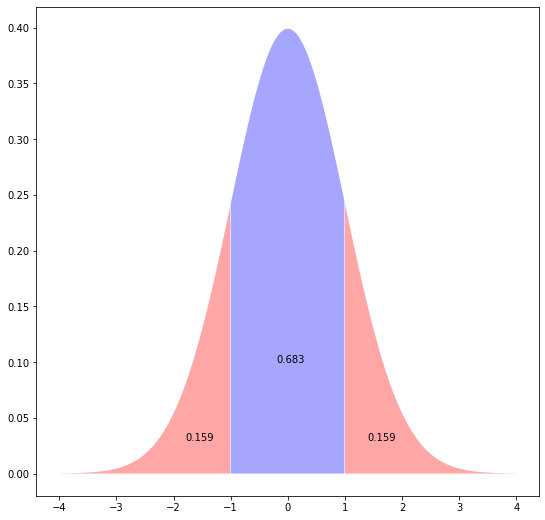


print the ppf for 2.5% cutoff and 97.5% cutoff. The output is similar as the following

In [15]:
# Calculate the ppf for the 2.5% cutoff
ppf_2p5 = distribution.ppf(0.025)

# Calculate the ppf for the 97.5% cutoff
ppf_97p5 = distribution.ppf(0.975)

# Print the ppf values
print("ppf for 2.5% cutoff:", ppf_2p5)
print("ppf for 97.5% cutoff:", ppf_97p5)

ppf for 2.5% cutoff: -1.9599639845400545
ppf for 97.5% cutoff: 1.959963984540054


The quantile output above confirms that roughly 5% of the data lies more than 2 standard deviations from the mean.


In [ ]:
## The Binomial Distribution

We will use binomial distribution to model coin flips. The scipy name for the binomial is binom. Here we set the number of flips per trial to 10,  the number of trials to 10000, and success probability to 0.5.

Create a random binomial distribution data "fair_coin_flips" in the code line below.

col_0   0    1    2     3     4     5     6     7    8   9   10
row_0                                                          
counts  14  110  455  1175  2108  2479  1974  1152  429  92  12


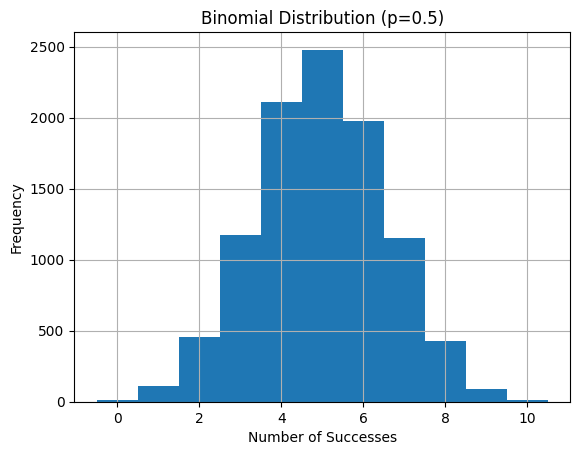

In [18]:
import scipy.stats as stats
import pandas as pd

# Set the parameters
num_flips_per_trial = 10
num_trials = 10000
success_prob = 0.5

# Create the random binomial distribution data
fair_coin_flips = stats.binom.rvs(num_flips_per_trial, success_prob, size=num_trials)

# Print out the counts for 0 heads, 1 head, ... 10 heads of each trial with 10000 trials
print(pd.crosstab(index="counts", columns=fair_coin_flips))

# Draw the histogram
pd.DataFrame(fair_coin_flips).hist(range=(-0.5, 10.5), bins=11)
plt.xlabel("Number of Successes")
plt.ylabel("Frequency")
plt.title("Binomial Distribution (p=0.5)")
plt.show()



The histogram above shows us that a binomial distribution with a 50% probability of success is roughly symmetric, with the most likely outcomes lying at the center. Change the success rate to 0.8, implement the codes similar as above to show the distribution won't be symmetric:

col_0   3   4    5    6     7     8     9     10
row_0                                           
counts   5  67  292  881  2027  3038  2625  1065


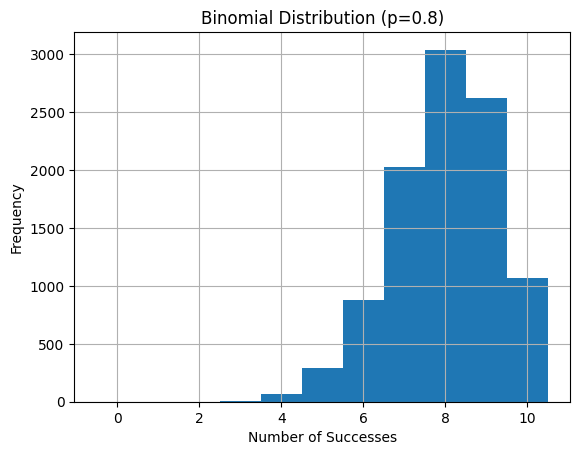

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
# Setting the parameters for the binomial distribution
num_flips_per_trial = 10
num_trials = 10000
success_prob = 0.8
fair_coin_flips = stats.binom.rvs(n=num_flips_per_trial, p=success_prob, size=num_trials)
cross_tab = pd.crosstab(index="counts", columns=fair_coin_flips)
print(cross_tab)
df = pd.DataFrame(fair_coin_flips)
df.hist(range=(-0.5, 10.5), bins=11)
plt.xlabel("Number of Successes")
plt.ylabel("Frequency")
plt.title("Binomial Distribution (p=0.8)")
plt.show()

Continue from above binomial distribution(success rate=0.8), give the codes to get the probability of achieving 5 heads or less with 10 flips.

In [20]:
import scipy.stats as stats

# Set the parameters for the binomial distribution
num_flips = 10
success_rate = 0.8

# Create a binomial distribution object
binom_dist = stats.binom(num_flips, success_rate)

# Calculate the probability of getting 5 heads or less
probability_5_heads_or_less = binom_dist.cdf(5)

# Print the probability
print(f"Probability of achieving 5 heads or less with 10 flips: {probability_5_heads_or_less:.4f}")


Probability of achieving 5 heads or less with 10 flips: 0.0328


Continue from above binomial distribution(success rate=0.8), give the codes to get the probability of achieving 9 heads or more with 10 flips.

In [21]:
import scipy.stats as stats

# Set the parameters for the binomial distribution
num_flips = 10
success_rate = 0.8

# Create a binomial distribution object
binom_dist = stats.binom(num_flips, success_rate)

# Calculate the probability of getting 9 heads or more
probability_9_heads_or_more = 1 - binom_dist.cdf(8)

# Print the probability
print(f"Probability of achieving 9 heads or more with 10 flips: {probability_9_heads_or_more:.4f}")


Probability of achieving 9 heads or more with 10 flips: 0.3758


For continuous probability density functions, you use pdf() to check the probability density at a given x value. For discrete distributions like the binomial, use stats.distribution.pmf() (probability mass function) to check the mass (proportion of observations) at given number of successes k.
Write codes to give the probability density at 5 heads with success rate of 0.5 of 10 flips.

In [22]:
import scipy.stats as stats

# Set the parameters for the binomial distribution
num_flips = 10
success_rate = 0.5

# Create a binomial distribution object
binom_dist = stats.binom(num_flips, success_rate)

# Calculate the probability density at 5 heads
density_5_heads = binom_dist.pmf(5)

# Print the probability density
print(f"Probability density at 5 heads with 10 flips: {density_5_heads:.4f}")


Probability density at 5 heads with 10 flips: 0.2461


What about the probability density at 8 heads with success rate of 0.8 of 10 flips?

In [23]:
import scipy.stats as stats

# Set the parameters for the binomial distribution
num_flips = 10
success_rate = 0.8

# Create a binomial distribution object
binom_dist = stats.binom(num_flips, success_rate)

# Calculate the probability density at 8 heads
density_8_heads = binom_dist.pmf(8)

# Print the probability density
print(f"Probability density at 8 heads with 10 flips: {density_8_heads:.4f}")


Probability density at 8 heads with 10 flips: 0.3020
